In [1]:
import depoSimulator_symmetry
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import torch
import pyvista as pv
import pandas as pd
from scipy import interpolate
import CollisionModule

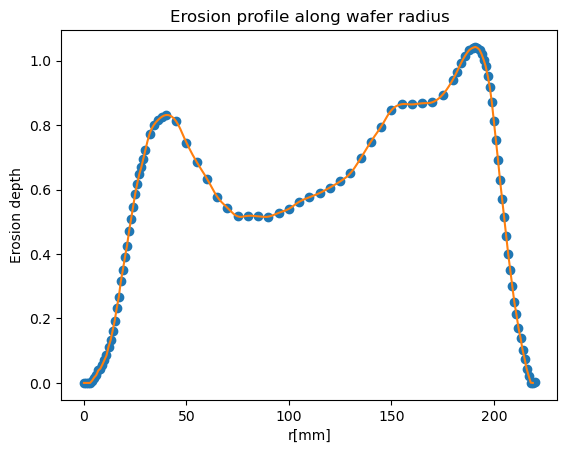

In [2]:
erosion = pd.read_excel('./erosionData.xlsx')

r = erosion['r'].to_numpy()
measure = erosion['measure'].to_numpy()
minus_m = measure < 0
measure[minus_m] = 0

erosion_func = interpolate.interp1d(r, measure, kind='quadratic')

xnew = np.arange(0, 220, 1)
ynew = erosion_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(r, measure, 'o', xnew, ynew, '-')
plt.title('Erosion profile along wafer radius')
plt.xlabel('r[mm]')
plt.ylabel('Erosion depth')
plt.show()

In [3]:
erosion_bins = 200
erosion_r = np.arange(0, 220, 220/erosion_bins)
erosion_r = erosion_r + 220/erosion_bins/2
# print(erosion_r)

erosion_event = erosion_func(erosion_r)
erosion_event_minus = erosion_event < 0
erosion_event[erosion_event_minus] = 0
for i in range(erosion_event.shape[0]):
    erosion_event[i] *= (220/erosion_bins)**2 + 2*i*(220/erosion_bins)**2
erosion_event *= 2e8

gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 220, 22)
bins = 200
r = 220/bins

for i in range(bins):
    # print(i)
    # print(erosion_event[0][i])
    theta = np.random.rand(int(erosion_event[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(erosion_event[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-220,220,200)
ybins = np.linspace(-220,220,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Position of released Al particles on target ')
ax.set_xlabel('x[m]')
ax.set_ylabel('y[m]')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

KeyboardInterrupt: 

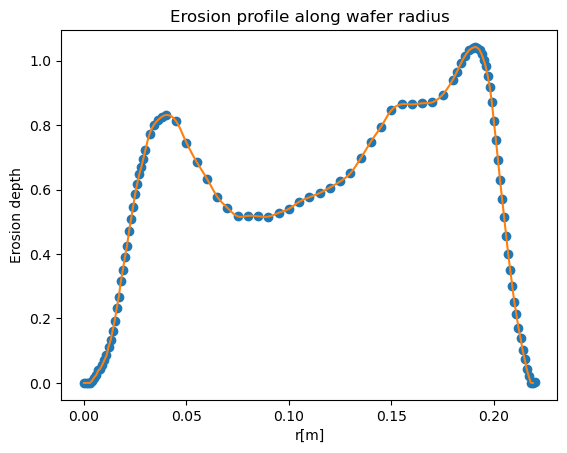

In [4]:
erosion = pd.read_excel('./erosionData.xlsx')

r = erosion['r'].to_numpy()/1000
measure = erosion['measure'].to_numpy()
minus_m = measure < 0
measure[minus_m] = 0

erosion_func = interpolate.interp1d(r, measure, kind='quadratic')

xnew = np.arange(0, 0.22, 0.001)
ynew = erosion_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(r, measure, 'o', xnew, ynew, '-')
plt.title('Erosion profile along wafer radius')
plt.xlabel('r[m]')
plt.ylabel('Erosion depth')
plt.show()

(6565275,)


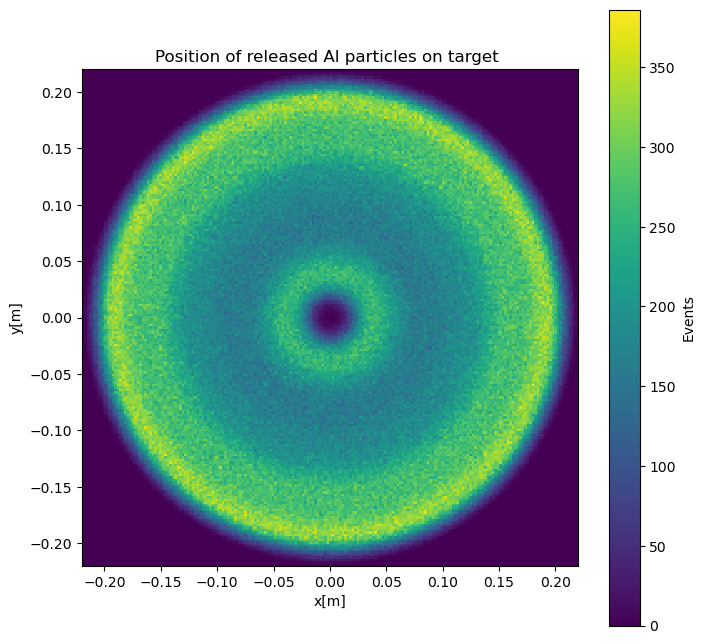

In [5]:
erosion_bins = 200
erosion_r = np.arange(0, 0.22, 0.22/erosion_bins)
erosion_r = erosion_r + 0.22/erosion_bins/2
# print(erosion_r)

erosion_event = erosion_func(erosion_r)
erosion_event_minus = erosion_event < 0
erosion_event[erosion_event_minus] = 0
for i in range(erosion_event.shape[0]):
    erosion_event[i] *= (0.22/erosion_bins)**2 + 2*i*(0.22/erosion_bins)**2
erosion_event *= 2e8

gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(erosion_event[0][i])
    theta = np.random.rand(int(erosion_event[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(erosion_event[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Position of released Al particles on target ')
ax.set_xlabel('x[m]')
ax.set_ylabel('y[m]')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [6]:
xbins = np.linspace(-0.22,0.22,80)
ybins = np.linspace(-0.22,0.22,80)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))

xbins = np.linspace(-22,22,79)
ybins = np.linspace(-22,22,79)
x, y = np.meshgrid(xbins, ybins)

grid = pv.StructuredGrid(x, y, H/200)
grid.plot()

Widget(value='<iframe src="http://localhost:53353/index.html?ui=P_0x2963bcdcd90_0&reconnect=auto" class="pyvis…

In [26]:
def rfunc(x, n, beta): #Release factor function
    # print("-------rfunc------")
    # print(x)
    # n = 1.6
    # beta = -0.7
    y = np.cos(x) ** n * (1 + beta * np.cos(x) ** 2)# * (n ** 2 + 4 * n + 3) / (n * beta + n + beta + 3) /2 / pi
    return y

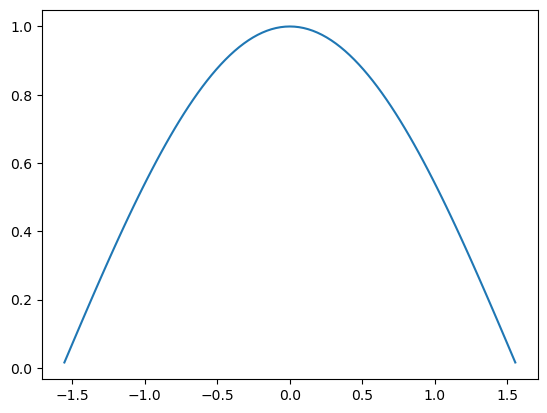

In [27]:
theta_bins_size = 100
theta_bins = np.linspace(-np.pi/2, np.pi/2, theta_bins_size)
theta_hist_x = theta_bins + np.pi/((theta_bins_size-1)*2)
theta_hist_x = theta_hist_x[:-1]

theta_hist_y = rfunc(theta_hist_x, 1, 0)

fig, ax = plt.subplots(1, 1)

ax.plot(theta_hist_x, theta_hist_y)

(array([ 15702.,  46807.,  77751., 108920., 139753., 170106., 200963.,
        231317., 261413., 291056., 320675., 350339., 378930., 407248.,
        435654., 463814., 489978., 517521., 543691., 568802., 594840.,
        618974., 642439., 666681., 689084., 710290., 732880., 752662.,
        772950., 790951., 810216., 827471., 844241., 859520., 874863.,
        888634., 902678., 915019., 926532., 935833., 946518., 954129.,
        962311., 970170., 973569., 980930., 984603., 985979., 988786.,
        989568., 990640., 987818., 986505., 984993., 979264., 975401.,
        970339., 961626., 955643., 945326., 936407., 925838., 913890.,
        902884., 889429., 874128., 860060., 844011., 827041., 810324.,
        791255., 772940., 752715., 732565., 710234., 689566., 665690.,
        643909., 618886., 593733., 569683., 543625., 517278., 490730.,
        463155., 435581., 407333., 378976., 350472., 320186., 291497.,
        261559., 231030., 200637., 170729., 139569., 108796.,  77761.,
      

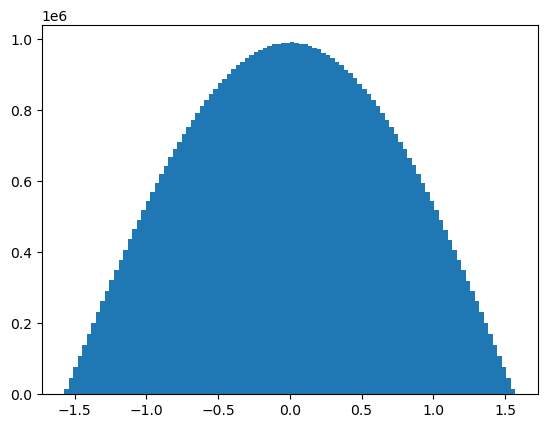

In [28]:
theta_sample = np.array([])
theta_hist_y *= 1e6
for i in range(theta_bins.shape[0] - 1):
    theta_sample = np.concatenate(( theta_sample, np.random.uniform(theta_bins[i], theta_bins[i+1], int(theta_hist_y[i]))))

plt.hist(theta_sample, bins=100)

(array([  1643.,   4919.,   8067.,  11305.,  14367.,  17711.,  20819.,
         24183.,  27244.,  30101.,  33450.,  36426.,  39556.,  42134.,
         45324.,  48461.,  51104.,  53705.,  56621.,  59259.,  61761.,
         64782.,  66888.,  69201.,  71749.,  73977.,  76259.,  79278.,
         80513.,  82931.,  84437.,  86083.,  87952.,  89454.,  91055.,
         92387.,  93834.,  95200.,  96849.,  97268.,  98386.,  99699.,
        100001., 101261., 101407., 102432., 102489., 102807., 103360.,
        102775., 102875., 103085., 102701., 102416., 102219., 102631.,
        101189.,  99936.,  99245.,  98328.,  97759.,  96644.,  95300.,
         93559.,  92784.,  91352.,  89530.,  88005.,  86196.,  84480.,
         82715.,  80692.,  78202.,  76677.,  73917.,  71974.,  69243.,
         66916.,  64240.,  61352.,  59303.,  56325.,  53868.,  50766.,
         48216.,  45120.,  42512.,  39460.,  36531.,  33258.,  30500.,
         27309.,  24062.,  20827.,  17556.,  14527.,  11514.,   8091.,
      

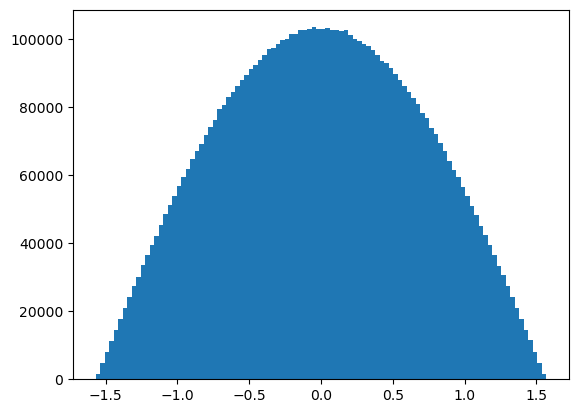

In [29]:
np.random.shuffle(theta_sample)
plt.hist(theta_sample[:int(gen_dist_x.shape[0])], bins=100)

In [30]:
def Energy_theta_func(C, enery, theta):
    U = 3.36 #binding
    m = 0.212
    Alpha = 0.14
    n = 0.5
    A = 13
    # m_t = 44.803928e-27
    # m_i = 66.335e-27
    m_t = 27
    m_i = 40
    q = 2 - m_t/(4*m_i)
    Q = 0.55
    E_inc = 437 # eVsb Vsb self bias
    return C * enery/(enery + U)**(3-2*m)*(1 - ((U + enery)/(U + Alpha*E_inc))**n)*np.exp(-A*((m_i/m_t)*((U + enery * np.cos(theta)**q)/E_inc))**Q)

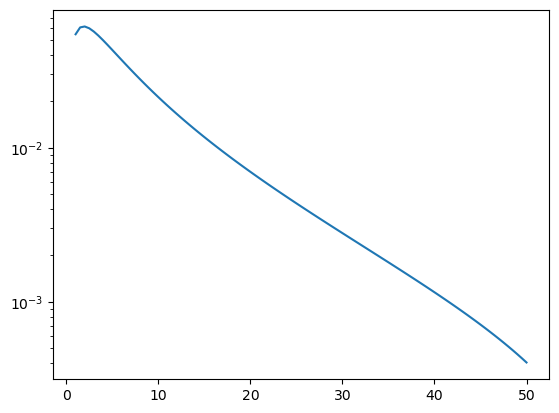

In [48]:
theta = 0.45*np.pi
enery = np.linspace(1, 50, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, Energy_theta_func(10, enery, theta))
ax.set_yscale('log')

In [49]:
enery_bins = np.linspace(1, 50, 50)

energy_theta_tuple = []
for j in range(theta_hist_x.shape[0]):
    enery_sample = np.array([])
    for i in range(enery_bins.shape[0] - 1):
        enery_sample = np.concatenate(( enery_sample, np.random.uniform(enery_bins[i], enery_bins[i+1], int(Energy_theta_func(10, enery_bins[i], theta_hist_x[j]) *1e6))))
    energy_theta_tuple.append(enery_sample)

for i in range(len(energy_theta_tuple)):
    np.random.shuffle(energy_theta_tuple[i])

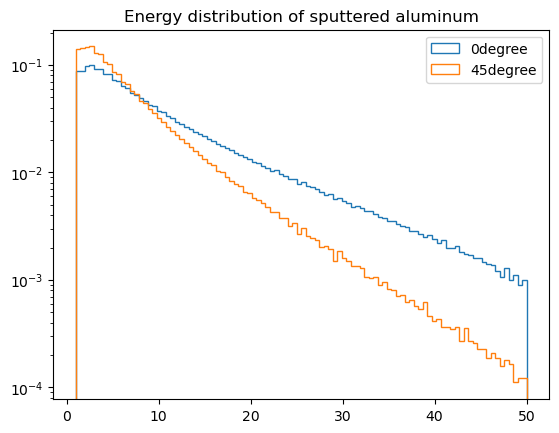

In [50]:
fig, ax = plt.subplots()
ax.set_title("Energy distribution of sputtered aluminum")
ax.hist(energy_theta_tuple[0],density=True, bins=100,histtype='step', stacked=True, fill=False, label='0degree')
ax.hist(energy_theta_tuple[25],density=True, bins=100,histtype='step', stacked=True, fill=False, label='45degree')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

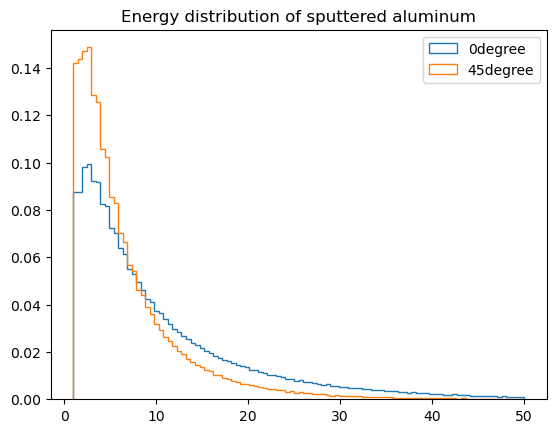

In [51]:
fig, ax = plt.subplots()
ax.set_title("Energy distribution of sputtered aluminum")
ax.hist(energy_theta_tuple[0],density=True, bins=100,histtype='step', stacked=True, fill=False, label='0degree')
ax.hist(energy_theta_tuple[25],density=True, bins=100,histtype='step', stacked=True, fill=False, label='45degree')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

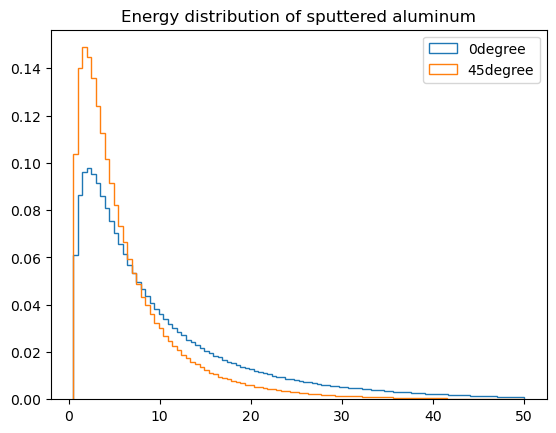

In [38]:
fig, ax = plt.subplots()
ax.set_title("Energy distribution of sputtered aluminum")
ax.hist(energy_theta_tuple[0],density=True, bins=100,histtype='step', stacked=True, fill=False, label='0degree')
ax.hist(energy_theta_tuple[25],density=True, bins=100,histtype='step', stacked=True, fill=False, label='45degree')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [34]:
test_sample = theta_sample[:int(gen_dist_x.shape[0])]
theta_hist_sample = np.histogram(test_sample, bins=99)

energy_sample = np.array([])
for i in range(99):
    energy_theta_sample = energy_theta_tuple[i][:theta_hist_sample[0][i] ]
    energy_sample = np.concatenate((energy_sample, energy_theta_sample))

print(energy_sample.shape)
print(gen_dist_x.shape[0])

(6565275,)
6565275


(array([3.20000e+01, 5.70000e+01, 8.60000e+01, 1.02000e+02, 1.59000e+02,
        1.70000e+02, 2.13000e+02, 2.30000e+02, 2.74000e+02, 3.58000e+02,
        3.95000e+02, 4.21000e+02, 5.41000e+02, 5.97000e+02, 6.99000e+02,
        7.92000e+02, 9.04000e+02, 9.62000e+02, 1.15800e+03, 1.31300e+03,
        1.47800e+03, 1.57400e+03, 1.71900e+03, 1.96800e+03, 2.33900e+03,
        2.48700e+03, 2.92400e+03, 3.18100e+03, 3.50800e+03, 4.00400e+03,
        4.35600e+03, 4.93300e+03, 5.40800e+03, 5.94900e+03, 6.67000e+03,
        7.31400e+03, 8.26300e+03, 9.09700e+03, 9.93300e+03, 1.10690e+04,
        1.21510e+04, 1.34110e+04, 1.49300e+04, 1.62690e+04, 1.79060e+04,
        1.96910e+04, 2.17430e+04, 2.39490e+04, 2.59880e+04, 2.89040e+04,
        3.14570e+04, 3.47400e+04, 3.74390e+04, 4.17050e+04, 4.50550e+04,
        4.91630e+04, 5.38830e+04, 5.84390e+04, 6.40860e+04, 6.95620e+04,
        7.52090e+04, 8.20840e+04, 8.87070e+04, 9.56000e+04, 1.04156e+05,
        1.11705e+05, 1.20313e+05, 1.29719e+05, 1.38

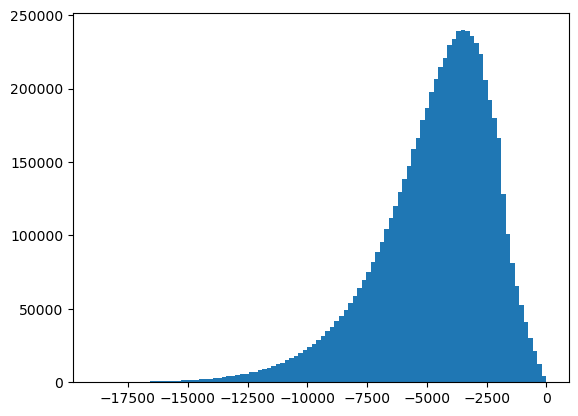

In [35]:
ev = 1.602176634e-19
velosity_norm_energy = np.sqrt((energy_sample*ev)*2/44.803928e-27)

test_sample_sort = np.sort(test_sample)

theta = test_sample_sort
phi = np.random.rand(gen_dist_x.shape[0])*2*np.pi
vel_x = np.cos(phi)*np.sin(theta)*velosity_norm_energy
vel_y = np.sin(phi)*np.sin(theta)*velosity_norm_energy
vel_z = np.cos(theta)*velosity_norm_energy

velosity_matrix = np.array([vel_x, vel_y, -vel_z]).T

rng = np.random.default_rng()
velosity_matrix = rng.permuted(velosity_matrix, axis=0)

plt.hist(velosity_matrix[:, 2], bins=100)

(array([2.20000e+01, 3.70000e+01, 4.80000e+01, 8.10000e+01, 1.30000e+02,
        1.66000e+02, 2.08000e+02, 2.99000e+02, 3.65000e+02, 4.62000e+02,
        5.86000e+02, 6.79000e+02, 8.19000e+02, 1.02500e+03, 1.25800e+03,
        1.42800e+03, 1.72100e+03, 2.02300e+03, 2.45700e+03, 2.91700e+03,
        3.35900e+03, 4.06500e+03, 4.68800e+03, 5.48400e+03, 6.58700e+03,
        7.75500e+03, 9.26600e+03, 1.09000e+04, 1.28860e+04, 1.52350e+04,
        1.80330e+04, 2.12850e+04, 2.56240e+04, 3.00760e+04, 3.57280e+04,
        4.27560e+04, 5.08970e+04, 6.05350e+04, 7.23070e+04, 8.66270e+04,
        1.02578e+05, 1.22839e+05, 1.46183e+05, 1.73160e+05, 2.06563e+05,
        2.45349e+05, 2.91608e+05, 3.52409e+05, 4.42729e+05, 6.90494e+05,
        6.48563e+05, 4.37054e+05, 3.48910e+05, 2.89487e+05, 2.43136e+05,
        2.05415e+05, 1.72637e+05, 1.44728e+05, 1.21599e+05, 1.02411e+05,
        8.52530e+04, 7.17530e+04, 6.02470e+04, 5.05200e+04, 4.23490e+04,
        3.56360e+04, 2.99140e+04, 2.50650e+04, 2.13

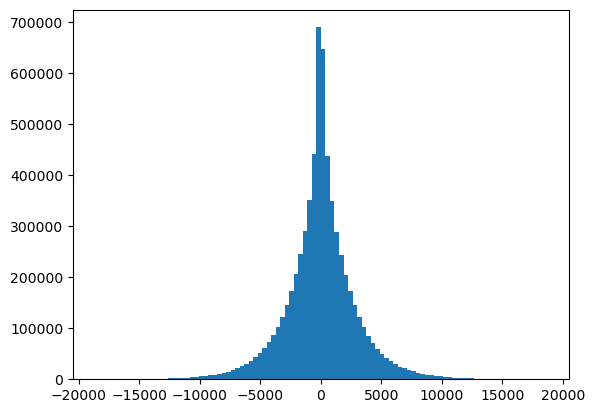

In [36]:
plt.hist(velosity_matrix[:, 1], bins=100)

In [18]:
from scipy.stats import rv_continuous
from scipy.stats.sampling import NumericalInversePolynomial
from scipy.special import gamma, factorial

In [19]:
def diVr_func(d_refi, eVr, wi):
    kb = 1.380649e-23
    Tref = 300
    ev = 1.60217663e-19
    diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))
    return diVr

In [20]:
def DXsec(d_refi, eVr, wi, chi):
    if chi == 0:
        return 0
    if chi != 0:
        return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)

C:\Users\URCS049\AppData\Local\Temp\ipykernel_9724\4036348.py:15: RuntimeWarning: [objid: PINV.001] 102 : center moved into domain of distribution => 
  rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
C:\Users\URCS049\AppData\Local\Temp\ipykernel_9724\4036348.py:19: RuntimeWarning: [objid: PINV.002] 102 : center moved into domain of distribution => 
  rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)


[0.33493849 0.41492027 0.19560173 ... 0.45874569 0.46957799 0.13071239]


(array([847749., 662911., 543366., 460392., 396346., 347811., 310089.,
        278804., 253996., 231764., 213652., 198488., 184908., 173133.,
        161079., 152025., 143536., 135894., 129189., 123207., 116859.,
        111442., 106309., 102660.,  98106.,  94591.,  90781.,  87338.,
         84895.,  81417.,  79101.,  76534.,  74242.,  71804.,  69454.,
         67519.,  65923.,  64496.,  63043.,  60993.,  59457.,  58481.,
         56676.,  55257.,  54222.,  53130.,  52029.,  51276.,  49892.,
         48654.,  48119.,  47953.,  46649.,  46055.,  45047.,  44013.,
         43885.,  42855.,  42251.,  41664.,  41117.,  40523.,  40275.,
         39385.,  39067.,  38647.,  38039.,  37942.,  37809.,  37199.,
         36248.,  36427.,  35874.,  35877.,  35732.,  34892.,  34914.,
         34842.,  34200.,  34171.,  34176.,  33908.,  33418.,  33568.,
         33242.,  33203.,  32852.,  32733.,  32916.,  32592.,  32241.,
         32405.,  31997.,  32114.,  32064.,  32035.,  31749.,  32025.,
      

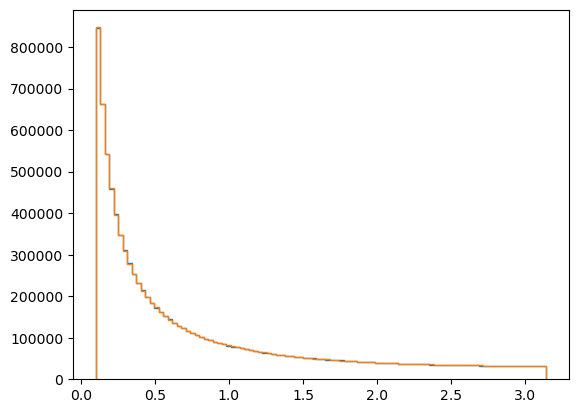

In [21]:
class DCS_gen_50(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 0.01, 0.7205, x)
    

class DCS_gen_100(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 50, 0.7205, x)
    
urng = np.random.default_rng()

dist50 =DCS_gen_50()
rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
rvs50 = rng50.rvs(size=10000000)

dist100 =DCS_gen_100()
rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)
rvs100 = rng100.rvs(size=10000000)
print(rvs100)
plt.hist(rvs100, bins= 100, histtype='step', stacked=True, fill=False)
plt.hist(rvs50, bins= 100, histtype='step', stacked=True, fill=False)

In [22]:
print(rvs50.shape)

(10000000,)


In [23]:
transport = CollisionModule.transport(pressure_pa=0.3, timeStep= 1e-9, temperature=300, cellSize=[240, 240, 150], celllength=2, chamberSize=[0.24, 0.24], DXsec=rvs50)

In [24]:
release_pos = np.array([gen_dist_x, gen_dist_y, np.zeros_like(gen_dist_x)]).T

print(release_pos.shape)
print(velosity_matrix.shape)

(6565275, 3)
(6565275, 3)


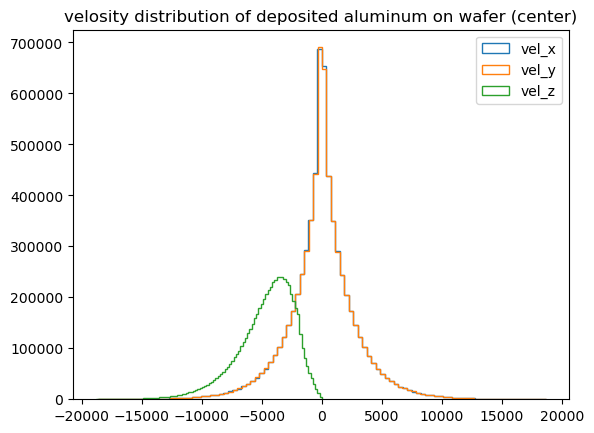

In [37]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [23]:
np.save('release_pos_1e8',release_pos)
np.save('velosity_matrix_1e8', velosity_matrix)
np.save('DXsec_Al_1e8', rvs50)

In [33]:
transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-7)

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]


(array([], dtype=float64), array([[0, 0, 0]]))